<a href="https://colab.research.google.com/github/kab755/java-course/blob/master/mentalH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#imports necessary libraries to do basic things on the dataset
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


print('Successfully imported')

Successfully imported


In [44]:
#Reading data
data = pd.read_csv('/content/survey.csv')
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [45]:
#Check the dataset for missing data
if data.isnull().sum().sum() == 0 :
    print ('There is no missing data in our dataset')
else:
    print('There is {} missing data in our dataset '.format(data.isnull().sum().sum()))

There is 1892 missing data in our dataset 


In [46]:
#Check our missing data from which columns and how many unique features they have.
frame = pd.concat([data.isnull().sum(), data.nunique(), data.dtypes], axis = 1, sort= False)
frame

,0,1,2
Timestamp,0,1246,object
Age,0,53,int64
Gender,0,49,object
Country,0,48,object
state,515,45,object
self_employed,18,2,object
family_history,0,2,object
treatment,0,2,object
work_interfere,264,4,object
no_employees,0,6,object


In [47]:
from sklearn.impute import SimpleImputer
import numpy as np
columns_to_drop = ['state', 'comments', 'Timestamp']
for column in columns_to_drop:
    if column in data.columns:
        data = data.drop(columns=[column])


# Fill in missing values in work_interfere column
data['work_interfere'] = np.ravel(SimpleImputer(strategy = 'most_frequent').fit_transform(data['work_interfere'].values.reshape(-1,1)))
data['self_employed'] = np.ravel(SimpleImputer(strategy = 'most_frequent').fit_transform(data['self_employed'].values.reshape(-1,1)))

data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


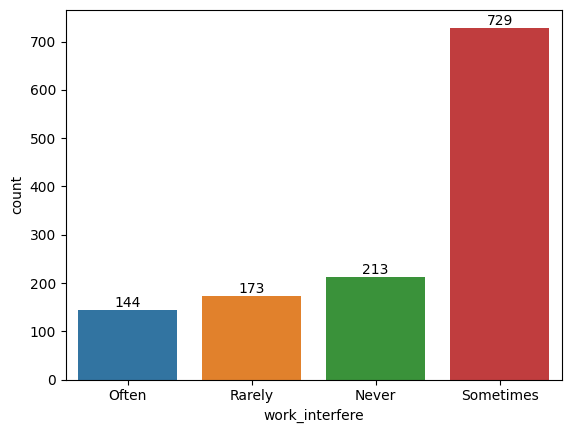

In [48]:
ax = sns.countplot(data=data, x='work_interfere');
ax.bar_label(ax.containers[0]);


In [49]:
#Check unique data in gender columns
print(data['Gender'].unique())
print('')
print('-'*75)
print('')
#Check number of unique data too.
print('number of unique Gender in our dataset is :', data['Gender'].nunique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']

---------------------------------------------------------------------------

number of unique Gender in our dataset is : 49


In [50]:
#Since we know there are only two genders and others lets categorise on basis of it

data['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

data['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

print(data['Gender'].unique())

['Female' 'Male' 'Other']


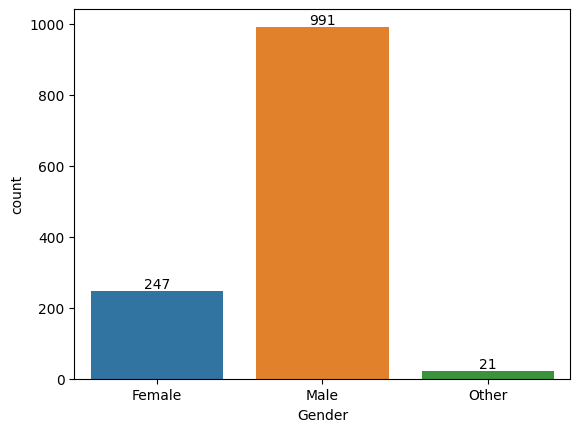

In [51]:
ax = sns.countplot(data=data, x='Gender');
ax.bar_label(ax.containers[0]);


In [52]:
#Checking whether data is missing or not
if data.isnull().sum().sum() == 0:
    print('There is no missing data')
else:
    print('There is {} missing data'.format(data.isnull().sum().sum()))


There is no missing data


In [53]:
#Let's check duplicated data.
if data.duplicated().sum() == 0:
    print('There is no duplicated data:')
else:
    print('There is {} duplicated data:'.format(data.duplicated().sum()))
    #If there is duplicated data drop it.
    data.drop_duplicates(inplace=True)

print('-'*50)
print(data.duplicated().sum())

There is 4 duplicated data:
--------------------------------------------------
0


In [54]:
data['Age'].unique()


array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [55]:
#lets take data of age till 100 years and will remove negative values
data.drop(data[data['Age']<0].index, inplace = True)
data.drop(data[data['Age']>99].index, inplace = True)

print(data['Age'].unique())

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72]


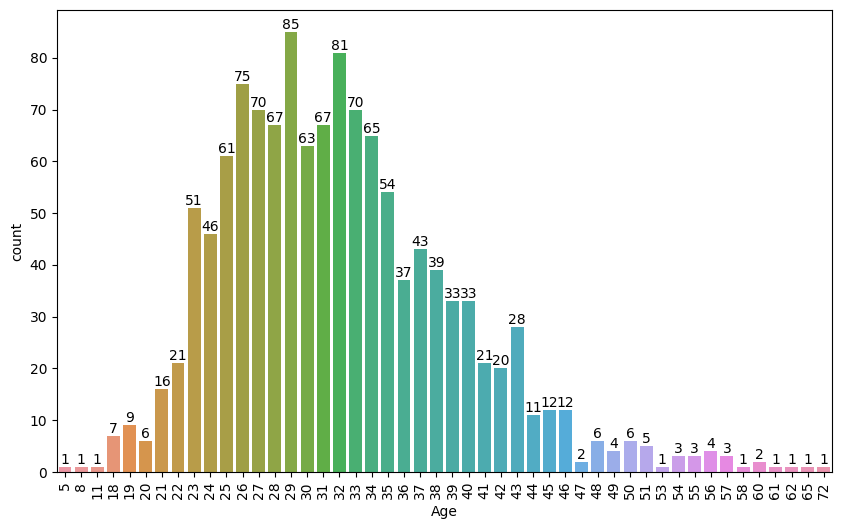

In [56]:
#Let's see the Age distribution in this dataset.
plt.figure(figsize = (10,6))
age_range_plot = sns.countplot(data = data, x = 'Age');
age_range_plot.bar_label(age_range_plot.containers[0]);
plt.xticks(rotation=90);

DATA **ENCODING**

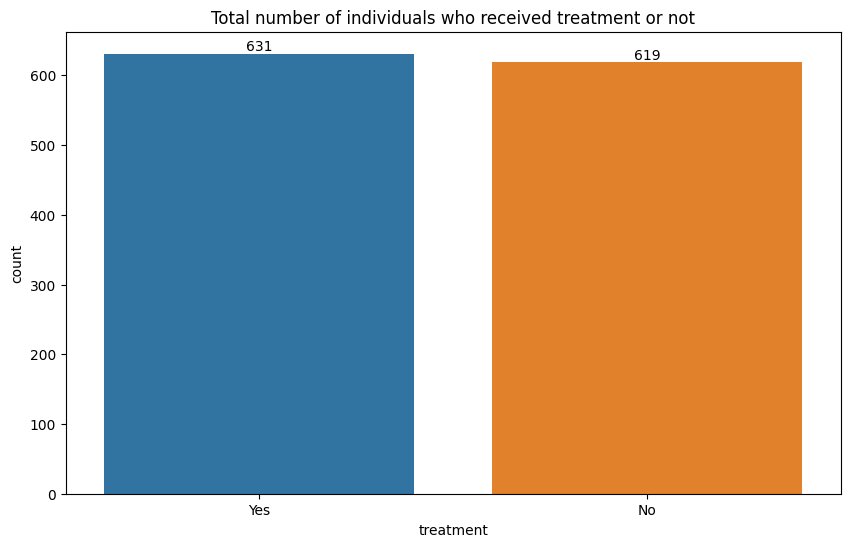

In [57]:
#In this plot We can see Total number of individuals who received treatment or not.
plt.figure(figsize = (10,6));
treat = sns.countplot(data = data,  x = 'treatment');
treat.bar_label(treat.containers[0]);
plt.title('Total number of individuals who received treatment or not');

In [58]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1250 non-null   int64 
 1   Gender                     1250 non-null   object
 2   Country                    1250 non-null   object
 3   self_employed              1250 non-null   object
 4   family_history             1250 non-null   object
 5   treatment                  1250 non-null   object
 6   work_interfere             1250 non-null   object
 7   no_employees               1250 non-null   object
 8   remote_work                1250 non-null   object
 9   tech_company               1250 non-null   object
 10  benefits                   1250 non-null   object
 11  care_options               1250 non-null   object
 12  wellness_program           1250 non-null   object
 13  seek_help                  1250 non-null   object
 14  anonymit

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#Make the dataset include all the columns we need to change their dtypes
columns_to_encode = ['Gender', 'Country', 'self_employed','family_history', 'treatment', 'work_interfere','no_employees',
                             'remote_work', 'tech_company','benefits','care_options', 'wellness_program',
                             'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
                             'coworkers', 'supervisor', 'mental_health_interview','phys_health_interview',
                             'mental_vs_physical', 'obs_consequence']
#Write a Loop for fitting LabelEncoder on columns_to_encode
for columns in columns_to_encode:
    data[columns] = le.fit_transform(data[columns])

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1250 non-null   int64
 1   Gender                     1250 non-null   int64
 2   Country                    1250 non-null   int64
 3   self_employed              1250 non-null   int64
 4   family_history             1250 non-null   int64
 5   treatment                  1250 non-null   int64
 6   work_interfere             1250 non-null   int64
 7   no_employees               1250 non-null   int64
 8   remote_work                1250 non-null   int64
 9   tech_company               1250 non-null   int64
 10  benefits                   1250 non-null   int64
 11  care_options               1250 non-null   int64
 12  wellness_program           1250 non-null   int64
 13  seek_help                  1250 non-null   int64
 14  anonymity               

In [60]:
#sd
data.describe()


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1250.00000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,...,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000
mean,32.02400,0.81760,37.792800,0.114400,0.390400,0.504800,2.128000,2.786400,0.298400,0.820000,...,0.648000,1.410400,0.849600,0.830400,0.973600,1.100800,0.868800,0.716000,0.814400,0.14480
std,7.38408,0.42388,13.334981,0.318424,0.488035,0.500177,1.165806,1.738733,0.457739,0.384341,...,0.909482,1.509634,0.766453,0.485205,0.620009,0.843806,0.425831,0.723715,0.835051,0.35204
min,5.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,27.00000,1.00000,42.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000
50%,31.00000,1.00000,45.000000,0.000000,0.000000,1.000000,3.000000,3.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
75%,36.00000,1.00000,45.000000,0.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.00000
max,72.00000,2.00000,46.000000,1.000000,1.000000,1.000000,3.000000,5.000000,1.000000,1.000000,...,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.00000


In [61]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

data['Age'] = MaxAbsScaler().fit_transform(data[['Age']])
data['Country'] = StandardScaler().fit_transform(data[['Country']])
data['work_interfere'] = StandardScaler().fit_transform(data[['work_interfere']])
data['no_employees'] = StandardScaler().fit_transform(data[['no_employees']])
data['leave'] = StandardScaler().fit_transform(data[['leave']])

data.describe()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1250.000000,1250.00000,1.250000e+03,1250.000000,1250.000000,1250.000000,1.250000e+03,1.250000e+03,1250.000000,1250.000000,...,1250.000000,1.250000e+03,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000
mean,0.444778,0.81760,3.979039e-17,0.114400,0.390400,0.504800,-1.193712e-16,-1.705303e-17,0.298400,0.820000,...,0.648000,-8.810730e-17,0.849600,0.830400,0.973600,1.100800,0.868800,0.716000,0.814400,0.14480
std,0.102557,0.42388,1.000400e+00,0.318424,0.488035,0.500177,1.000400e+00,1.000400e+00,0.457739,0.384341,...,0.909482,1.000400e+00,0.766453,0.485205,0.620009,0.843806,0.425831,0.723715,0.835051,0.35204
min,0.069444,0.00000,-2.835244e+00,0.000000,0.000000,0.000000,-1.826077e+00,-1.603187e+00,0.000000,0.000000,...,0.000000,-9.346401e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.375000,1.00000,3.156273e-01,0.000000,0.000000,0.000000,-9.679583e-01,-1.027826e+00,0.000000,1.000000,...,0.000000,-9.346401e-01,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000
50%,0.430556,1.00000,5.406895e-01,0.000000,0.000000,1.000000,7.482798e-01,1.228972e-01,0.000000,1.000000,...,0.000000,-2.719628e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
75%,0.500000,1.00000,5.406895e-01,0.000000,1.000000,1.000000,7.482798e-01,6.982587e-01,1.000000,1.000000,...,2.000000,3.907145e-01,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.00000
max,1.000000,2.00000,6.157103e-01,1.000000,1.000000,1.000000,7.482798e-01,1.273620e+00,1.000000,1.000000,...,2.000000,1.716069e+00,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.00000


TRAINING ANG TESTING SPLIT


In [62]:
from sklearn.model_selection import train_test_split

#I wanna work on 'treatment' column.
X = data.drop(columns = ['treatment'])
y = data['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train.shape, y_train.shape)
print('-'*30)
print(X_test.shape, y_test.shape)
print('_'*30)

(937, 23) (937,)
------------------------------
(313, 23) (313,)
______________________________


In [63]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.naive_bayes import GaussianNB

In [64]:
# Define the steps for the pipeline
steps_nb = [('Scaler', StandardScaler()),
            ('clf', GaussianNB())]

# Create the pipeline
clf_nb = Pipeline(steps=steps_nb)

# Fit the model
clf_nb.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = clf_nb.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_true=y_test, y_pred=y_pred_nb) * 100
print('Naive Bayes accuracy:', accuracy_nb)

Naive Bayes accuracy: 68.370607028754


In [65]:
!pip install shap



In [66]:
import shap


In [67]:
from sklearn.metrics import confusion_matrix

# ... (your existing code)

# After you have predicted the target variable 'y_pred_nb'
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[114  47]
 [ 52 100]]


In [68]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_nb)
print(report)


              precision    recall  f1-score   support

           0       0.69      0.71      0.70       161
           1       0.68      0.66      0.67       152

    accuracy                           0.68       313
   macro avg       0.68      0.68      0.68       313
weighted avg       0.68      0.68      0.68       313



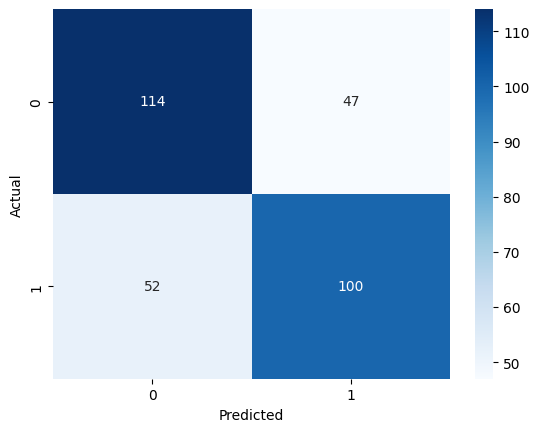

In [69]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

# Load and preprocess your data (including encoding and scaling)

# Define and train your neural network model
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)

# Fit the model
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred_nn = mlp.predict(X_test)

# Convert the predictions to 0 and 1
y_pred_nn_binary = (y_pred_nn > 0.5).astype(int)

# Calculate accuracy
accuracy_nn = accuracy_score(y_true=y_test, y_pred=y_pred_nn_binary) * 100
print('Neural Network accuracy:', accuracy_nn)

# Calculate and display confusion matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn_binary)
print("Confusion Matrix:")
print(conf_matrix_nn)

# Display classification report
report_nn = classification_report(y_test, y_pred_nn_binary)
print(report_nn)


Neural Network accuracy: 65.814696485623
Confusion Matrix:
[[110  51]
 [ 56  96]]
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       161
           1       0.65      0.63      0.64       152

    accuracy                           0.66       313
   macro avg       0.66      0.66      0.66       313
weighted avg       0.66      0.66      0.66       313



In [71]:
from sklearn.ensemble import RandomForestClassifier
import shap


In [72]:
# Define and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)


In [73]:
accuracy_rf = accuracy_score(y_true=y_test, y_pred=y_pred_rf) * 100
print('Random Forest accuracy:', accuracy_rf)


Random Forest accuracy: 72.52396166134186


In [74]:
shap.initjs()
ex_rf = shap.TreeExplainer(rf_model)
shap_values_rf = ex_rf.shap_values(X_test)


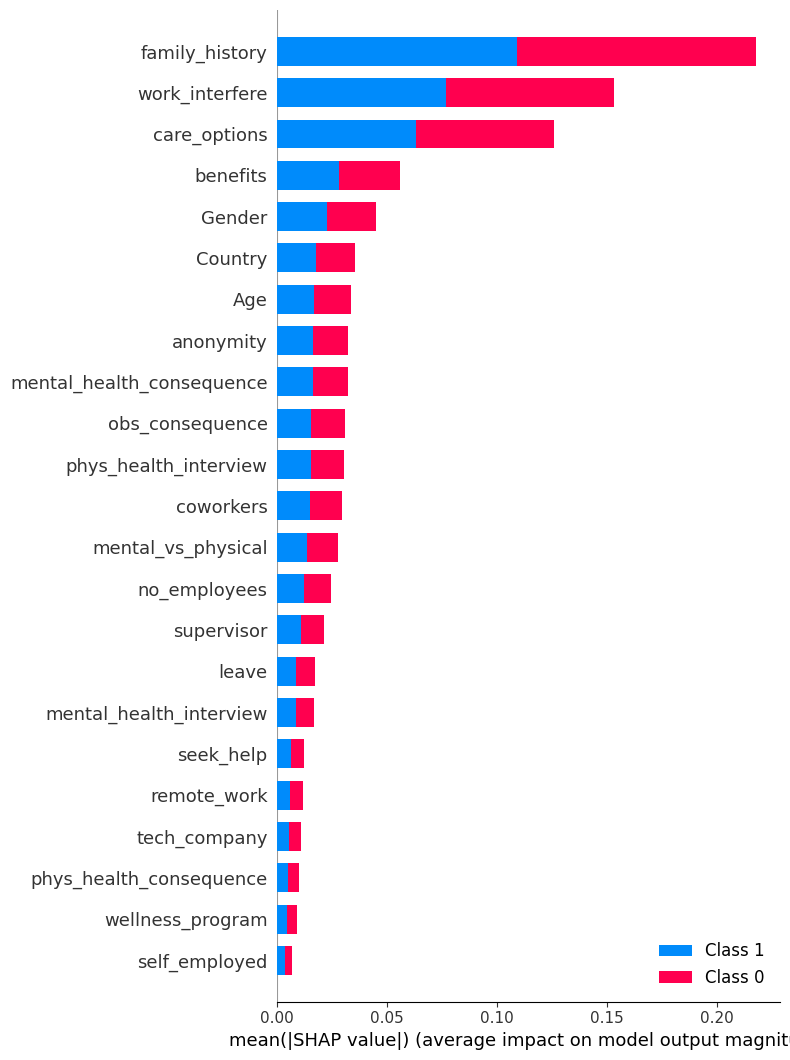

In [75]:
shap.summary_plot(shap_values_rf, X_test, max_display=30)


In [76]:
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)


              precision    recall  f1-score   support

           0       0.72      0.76      0.74       161
           1       0.73      0.69      0.71       152

    accuracy                           0.73       313
   macro avg       0.73      0.72      0.72       313
weighted avg       0.73      0.73      0.72       313



In [77]:
# Predict using the Neural Network model
y_pred_nn = mlp.predict(X_test)

# Convert the predictions to 0 and 1
y_pred_nn_binary = (y_pred_nn > 0.5).astype(int)

# Predict using the Random Forest model
y_pred_rf = rf_model.predict(X_test)


In [78]:
import pandas as pd

# Assuming y_pred_nn_binary and y_pred_rf are the predictions
predictions_df = pd.DataFrame({'Neural_Network_Predictions': y_pred_nn_binary, 'Random_Forest_Predictions': y_pred_rf})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)


In [79]:
predictions_df

,Neural_Network_Predictions,Random_Forest_Predictions
0,0,0
1,0,0
2,1,1
3,0,0
4,1,0
...,...,...
308,0,1
309,1,1
310,0,0
311,1,1


from matplotlib import pyplot as plt
predictions_df['Neural_Network_Predictions'].plot(kind='hist', bins=20, title='Neural_Network_Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions_df['Random_Forest_Predictions'].plot(kind='hist', bins=20, title='Random_Forest_Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions_df.plot(kind='scatter', x='Neural_Network_Predictions', y='Random_Forest_Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions_df['Neural_Network_Predictions'].plot(kind='line', figsize=(8, 4), title='Neural_Network_Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
predictions_df['Random_Forest_Predictions'].plot(kind='line', figsize=(8, 4), title='Random_Forest_Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)